Quick code to see why entropy is preferable to Gini for imbalanced classes


In [151]:
# create a little dataset with two classes; class is the final column.  
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
alt.renderers.enable('notebook')
N1 = 2000
N2 = 10
x1 = 4.0
s1 = 2.0
x2 = 8.0
s2 = 2.0
l1 =  np.random.normal(loc=x1, scale=s1, size=N1)
l2 =  np.random.normal(loc=x2, scale=s2, size=N2)
dataset = [[item, 0] for item in l1]
dataset.extend([[item, 1] for item in l2])

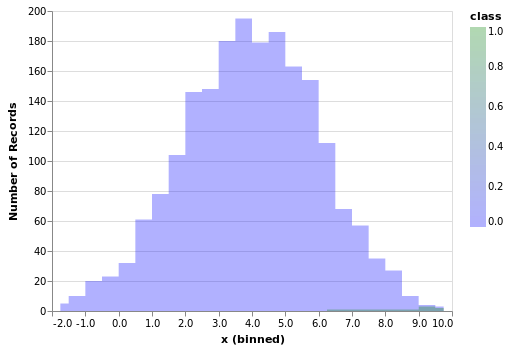

In [152]:
# make a little plot
df = pd.DataFrame(dataset,columns=['x', 'class'])
alt.Chart(df).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('x', bin=alt.Bin(maxbins=40)),
    alt.Y('count()', stack=None),
    alt.Color(
        'class',
        scale=alt.Scale(range=['#0000ff', '#008000'])
    )
)

In [153]:
# Cheating just to get a result quickly; this code snaked from 
# https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		#gini += (1.0 - score) * (size / n_instances)
		gini += (1 - score) * (size / n_instances)
	return gini
# Calculate the Gini index for a split dataset

def entropy_index(groups, classes):
	# count all samples at split point
	import math
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	entropy = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			if (p>0):
				score += p * math.log(p,2)
		# weight the group score by its relative size
		entropy += (1 - score) * (size / n_instances)
	return entropy

# Select the best split point for a dataset
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

def calc_scores(dataset,index=0):
	class_values = list(set(row[-1] for row in dataset))
	# b_index, b_value, b_score, b_groups = 999, 999, 999, None
	b_values  = []
	b_gini    = []
	b_entropy = []
	for row in dataset:
		groups = test_split(index, row[index], dataset)
		gini   = gini_index(groups, class_values)
		b_values.append(row[index])
		b_gini.append(gini)
		entropy = entropy_index(groups, class_values)
		b_entropy.append(entropy)
		#if gini < b_score:
		#	b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'value':b_values, 'gini':b_gini, 'entropy': b_entropy}

    

In [154]:
y = calc_scores(dataset)

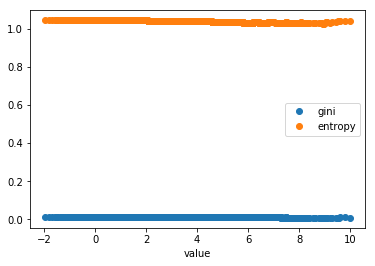

In [155]:
df = pd.DataFrame(y)
#df.plot()
df.plot(x='value', y=['gini', 'entropy'], style='o')
plt.show()
#df.pivot(index='aContent',columns='wFlow',values='DO Difference').plot()

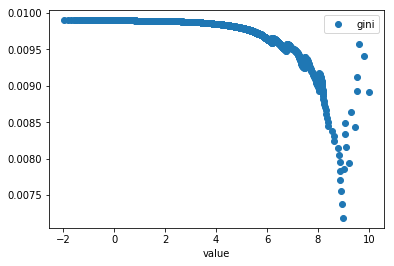

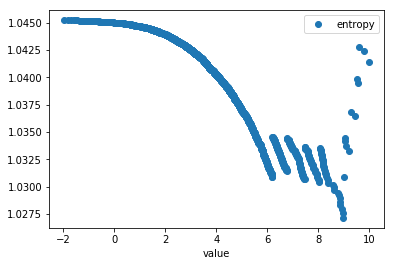

In [156]:
df.plot(x='value', y=['gini'], style='o')
plt.show()
df.plot(x='value', y=['entropy'], style='o')
plt.show()
